# Capston Project 2 - The Financial Performance of the ESG Funds
# Exploratory Data Analysis
By Tingyin Xiao

<a id="0"></a> <br>
 # Table of Contents  

* [1. Introduction](#1)
* [2. Importing the Dependencies](#2)
* [3. Importing the Data](#3)
* [4. Explore the Time Series Data](#4)
* [5. Explore the Data with Features](#5)
    * [5.1 ESG features](#5.1)
    * [5.2 Fossil Fuel Category](#5.2)
    * [5.3 Relationship between Fossil Fuel Features](#5.3)
* [6. Summary](#6)

<a id="1"></a> 
## Introduction

In the data wrangling session, we have organized and cleaned the data for the ESG funds financial performance. There are two cleaned datasets we will use in this session of exploratory data analysis (EDA). The first one is the time series data for the main target variable, which is the month end trailing returns, 1 year. This data has three columns, the first is the share class names, the second is the date for the financial performance, and the third is the value of the target variable. The second data include both this time series and all available feature variables that have less than 10 percent of missing data. It also include two other target variables, the month end trailing returns for 3 years and 5 years. Both of the two data have 172949 rows and 5579 distinct share classes. The second data with the features have 91 columns, including 6 categories of ESG feature variables.

In this session of EDA, my goal is to look at patterns in the time series of the target variables as well as some key features. The relationship between feature variables of interest will also be explored.

[Back to the Table of Contents](#0)

<a id="2"></a> 
## Importing the Dependencies

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[Back to the Table of Contents](#0)

<a id="3"></a> 
## Importing the Data

In [82]:
# import the time series data

data = pd.read_csv('data/shareclasses_one_year_return_max_months_long_time_series.csv')

In [83]:
# import the dataframe with all features that have less than 10% missing data

df = pd.read_csv('data/shareclasses_one_year_return_max_months_less_than_10pct_missing.csv')

[Back to the Table of Contents](#0)

<a id="4"></a> 
## Explore the Time Series Data

In [84]:
data.columns

Index(['Shareclass name', 'Financial performance as-of date',
       'Month end trailing returns, 1 year'],
      dtype='object')

In [85]:
# each share class has a time series of the length of 31 months, 
# the number of share classes is:

shareclass_count = len(data.iloc[:,0])/31
shareclass_count

5579.0

In [86]:
# calculate the mean time series of all share classes

grouped_data = data.groupby(['Financial performance as-of date', 'Shareclass name'])['Month end trailing returns, 1 year'].mean().reset_index()

In [87]:
grouped_data.head()

,Financial performance as-of date,Shareclass name,"Month end trailing returns, 1 year"
0,2020-03-31,1919 Socially Responsive Balanced A,0.00352
1,2020-03-31,1919 Socially Responsive Balanced C,-0.65016
2,2020-03-31,1919 Socially Responsive Balanced I,0.37831
3,2020-03-31,AB All China Equity A,-5.29877
4,2020-03-31,AB All China Equity Advisor,-5.08594


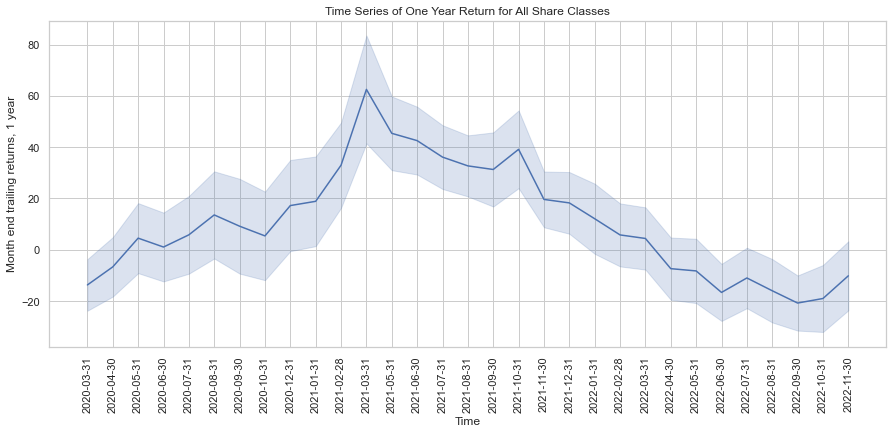

In [100]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 6))

# Plot the mean time series using Seaborn's lineplot with stadard deviation 
sns.lineplot(data=grouped_data, 
             x='Financial performance as-of date', 
             y='Month end trailing returns, 1 year', 
             ci = 'sd')
plt.xlabel('Time')
plt.ylabel('Month end trailing returns, 1 year')
plt.title('Time Series of One Year Return for All Share Classes')
plt.grid(True)

plt.xticks(rotation = 90)
plt.show()

In [10]:
# compare to other targets

targets = df.filter(like = 'returns')
targets.columns

Index(['Month end trailing returns, 1 year',
       'Month end trailing returns, 3 year',
       'Month end trailing returns, 5 year'],
      dtype='object')

In [76]:
df['Month end trailing returns, 5 year'].head()

0    4.59848
1    5.35168
2    5.65125
3   -3.87809
4   -4.17165
Name: Month end trailing returns, 5 year, dtype: float64

In [12]:
# calculate the mean time series of all share classes for each targets

grouped_data_1yr = df.groupby(['Financial performance as-of date', 'Shareclass name'])['Month end trailing returns, 1 year'].mean().reset_index()
mean_series_1yr = grouped_data_1yr.groupby('Financial performance as-of date')['Month end trailing returns, 1 year'].mean().reset_index()

grouped_data_3yr = df.groupby(['Financial performance as-of date', 'Shareclass name'])['Month end trailing returns, 3 year'].mean().reset_index()
mean_series_3yr = grouped_data_3yr.groupby('Financial performance as-of date')['Month end trailing returns, 3 year'].mean().reset_index()

grouped_data_5yr = df.groupby(['Financial performance as-of date', 'Shareclass name'])['Month end trailing returns, 5 year'].mean().reset_index()
mean_series_5yr = grouped_data_5yr.groupby('Financial performance as-of date')['Month end trailing returns, 5 year'].mean().reset_index()


In [13]:
mean_series_1yr.rename(columns = {'Month end trailing returns, 1 year': 'Month end trailing returns'}, inplace = True)
mean_series_3yr.rename(columns = {'Month end trailing returns, 3 year': 'Month end trailing returns'}, inplace = True)
mean_series_5yr.rename(columns = {'Month end trailing returns, 5 year': 'Month end trailing returns'}, inplace = True)

mean_series_1yr['Length'] = '1 year'
mean_series_3yr['Length'] = '3 year'
mean_series_5yr['Length'] = '5 year'

mean_series_1yr.head()

,Financial performance as-of date,Month end trailing returns,Length
0,2020-03-31,-13.750522,1 year
1,2020-04-30,-6.705756,1 year
2,2020-05-31,4.501267,1 year
3,2020-06-30,1.031309,1 year
4,2020-07-31,5.791953,1 year


In [77]:
target_ts = pd.concat([mean_series_1yr, mean_series_3yr, mean_series_5yr], axis=0)
target_ts_sorted = target_ts.sort_values(['Financial performance as-of date','Length']).reset_index(drop = True)
target_ts_sorted.head(10) 

,Financial performance as-of date,Month end trailing returns,Length
0,2020-03-31,-13.750522,1 year
1,2020-03-31,0.417171,3 year
2,2020-03-31,2.269470,5 year
3,2020-04-30,-6.705756,1 year
4,2020-04-30,3.633853,3 year
5,2020-04-30,4.340444,5 year
6,2020-05-31,4.501267,1 year
7,2020-05-31,5.014354,3 year
8,2020-05-31,5.271856,5 year
9,2020-06-30,1.031309,1 year


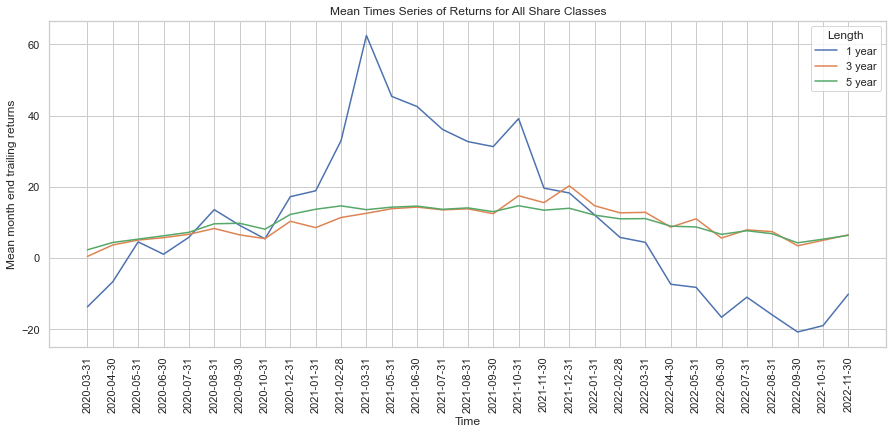

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 6))

# Plot the mean time series using Seaborn's lineplot
sns.lineplot(data=target_ts_sorted, 
             x='Financial performance as-of date', 
             y='Month end trailing returns', 
             hue = 'Length')
plt.xlabel('Time')
plt.ylabel('Mean month end trailing returns')
plt.title('Mean Times Series of Returns for All Share Classes')
plt.grid(True)

plt.xticks(rotation = 90)
plt.show()

[Back to the Table of Contents](#0)

<a id="5"></a> 
## Explore the Data with Features

In [16]:
df.columns

Index(['Fund profile: Shareclass name', 'Fund profile: Ticker',
       'Fund profile: Fund name', 'Fund profile: Asset manager',
       'Fund profile: Shareclass type',
       'Fund profile: Shareclass inception date',
       'Fund profile: Category group',
       'Fund profile: Oldest shareclass inception date',
       'Fund profile: Shareclass tickers',
       'Fund profile: Portfolio holdings as-of date',
       'Fund profile: Fund net assets', 'Fund profile: Percent rated',
       'Fossil Free Funds: Fossil fuel grade',
       'Fossil Free Funds: Fossil fuel holdings, count',
       'Fossil Free Funds: Fossil fuel holdings, weight',
       'Fossil Free Funds: Fossil fuel holdings, asset',
       'Fossil Free Funds: Carbon Underground 200, count',
       'Fossil Free Funds: Carbon Underground 200, weight',
       'Fossil Free Funds: Carbon Underground 200, asset',
       'Fossil Free Funds: Coal industry, count',
       'Fossil Free Funds: Coal industry, weight',
       'Fossil Free

[Back to the Table of Contents](#0)

<a id="5.1"></a> 
### ESG features

In [62]:
# ESG feature categories

esg_features = df.filter(like = ' Funds: ').columns
esg_categories = esg_features.str.split(':').str[0].unique().tolist()
esg_categories

['Fossil Free Funds',
 'Deforestation Free Funds',
 'Gender Equality Funds',
 'Gun Free Funds',
 'Weapon Free Funds',
 'Tobacco Free Funds']

In [63]:
# countplot for the grade variable from each of these ESG categories of features
grade_order = ['A', 'B', 'C', 'D', 'F']
group_columns = df.filter(like = 'grade')
group_columns.columns.tolist()

['Fossil Free Funds: Fossil fuel grade',
 'Deforestation Free Funds: Deforestation grade',
 'Gender Equality Funds: Gender equality grade',
 'Gun Free Funds: Civilian firearm grade',
 'Weapon Free Funds: Military weapon grade',
 'Tobacco Free Funds: Tobacco grade']

In [64]:
group_columns.shape

(172949, 6)

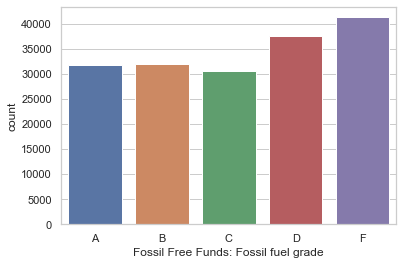

In [65]:
sns.countplot(x = 'Fossil Free Funds: Fossil fuel grade', 
              data = df,
              order = grade_order)
plt.show()

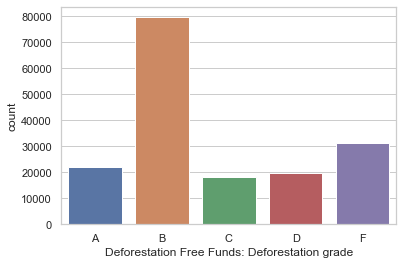

In [66]:
sns.countplot(x = 'Deforestation Free Funds: Deforestation grade',
              data = df,
              order = grade_order)
plt.show()

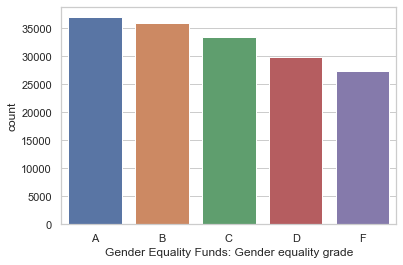

In [67]:
sns.countplot(x = 'Gender Equality Funds: Gender equality grade', 
              data = df,
              order = grade_order)
plt.show()

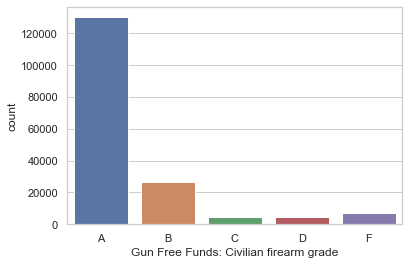

In [68]:
sns.countplot(x = 'Gun Free Funds: Civilian firearm grade', 
              data = df,
              order = grade_order)
plt.show()

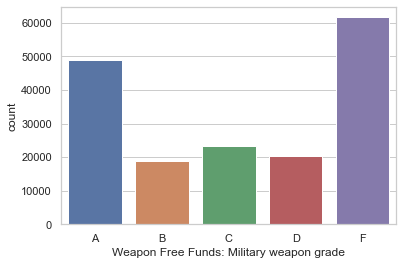

In [69]:
sns.countplot(x = 'Weapon Free Funds: Military weapon grade', 
              data = df,
              order = grade_order)
plt.show()

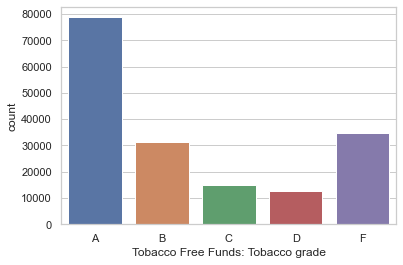

In [70]:
sns.countplot(x = 'Tobacco Free Funds: Tobacco grade', 
              data = df,
              order = grade_order)
plt.show()

The count plots show that some of the categories have uneven distribution over the grade (e.g., the gun related features) and some have more even distributions (e.g., the fossil fuel features). In the following session, we will focus on the fossil fuel related features for in-depth analysis. 

[Back to the Table of Contents](#0)

<a id="5.2"></a> 
### Fossil Fuel Category

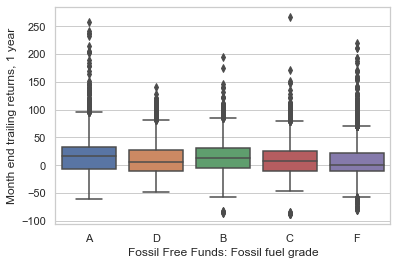

In [48]:
# box plot of the one year return for each Fossil fuel grade

sns.boxplot(x = 'Fossil Free Funds: Fossil fuel grade', 
            y = 'Month end trailing returns, 1 year',
            data = df)
plt.show()

In [78]:
# Group the data by Fossil fuel grade and calculate the mean time series for each group

grouped_ffgrade = df.groupby(['Financial performance as-of date', 'Fossil Free Funds: Fossil fuel grade'])['Month end trailing returns, 1 year'].mean().reset_index()
grouped_ffgrade.head()

,Financial performance as-of date,Fossil Free Funds: Fossil fuel grade,"Month end trailing returns, 1 year"
0,2020-03-31,A,-7.821344
1,2020-03-31,B,-10.389064
2,2020-03-31,C,-14.845162
3,2020-03-31,D,-15.837607
4,2020-03-31,F,-20.112730


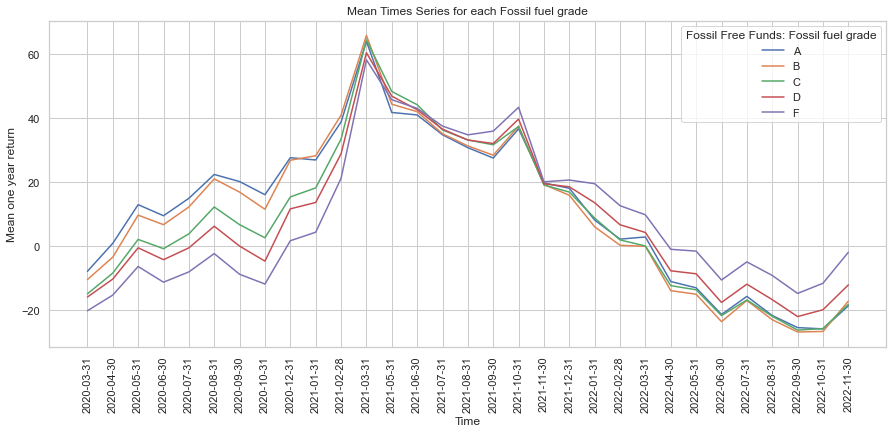

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 6))

# Plot the mean time series using Seaborn's lineplot
sns.lineplot(data=grouped_ffgrade, 
             x='Financial performance as-of date', 
             y='Month end trailing returns, 1 year', 
             color='b',
             hue = 'Fossil Free Funds: Fossil fuel grade')
plt.xlabel('Time')
plt.ylabel('Mean one year return')
plt.title('Mean Times Series for each Fossil fuel grade')
plt.grid(True)

plt.xticks(rotation = 90)
plt.show()

In [72]:
# plot the time series for count of share classes of each grade
ffgrade_shareclass_counts = df.groupby(['Fossil Free Funds: Fossil fuel grade', 'Shareclass name', 'Financial performance as-of date']).size().reset_index(name='Count')
ffgrade_shareclass_counts.head() 

,Fossil Free Funds: Fossil fuel grade,Shareclass name,Financial performance as-of date,Count
0,A,1919 Socially Responsive Balanced A,2020-03-31,1
1,A,1919 Socially Responsive Balanced A,2020-04-30,1
2,A,1919 Socially Responsive Balanced A,2020-05-31,1
3,A,1919 Socially Responsive Balanced A,2020-06-30,1
4,A,1919 Socially Responsive Balanced A,2020-07-31,1


In [71]:
ffgrade_time_counts = ffgrade_shareclass_counts.groupby(['Fossil Free Funds: Fossil fuel grade', 'Financial performance as-of date'])['Count'].sum().reset_index()
ffgrade_time_counts.head()

,Fossil Free Funds: Fossil fuel grade,Financial performance as-of date,Count
0,A,2020-03-31,1005
1,A,2020-04-30,1085
2,A,2020-05-31,1124
3,A,2020-06-30,1111
4,A,2020-07-31,1126


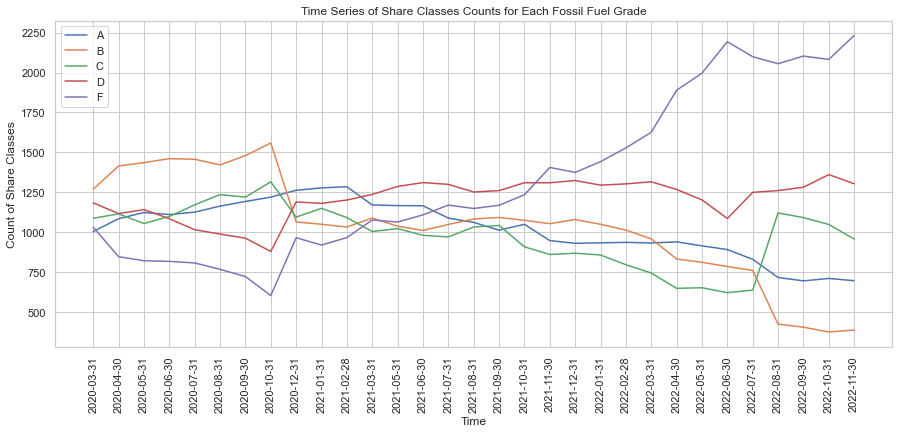

In [30]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=ffgrade_time_counts, 
             x='Financial performance as-of date', 
             y='Count', 
             hue='Fossil Free Funds: Fossil fuel grade')

plt.xlabel('Time')
plt.ylabel('Count of Share Classes')
plt.title('Time Series of Share Classes Counts for Each Fossil Fuel Grade')
plt.legend()

plt.grid(True)

plt.xticks(rotation = 90)
plt.show()

[Back to the Table of Contents](#0)

<a id="5.3"></a> 
### Relationship between Fossil Fuel Features

In [73]:
fff_features = df.filter(like = 'Fossil Free Funds:')
fff_features.head()

,Fossil Free Funds: Fossil fuel grade,"Fossil Free Funds: Fossil fuel holdings, count","Fossil Free Funds: Fossil fuel holdings, weight","Fossil Free Funds: Fossil fuel holdings, asset","Fossil Free Funds: Carbon Underground 200, count","Fossil Free Funds: Carbon Underground 200, weight","Fossil Free Funds: Carbon Underground 200, asset","Fossil Free Funds: Coal industry, count","Fossil Free Funds: Coal industry, weight","Fossil Free Funds: Coal industry, asset",...,"Fossil Free Funds: Fossil-fired utilities, asset",Fossil Free Funds: Relative carbon footprint (tonnes CO2 / $1M USD invested),Fossil Free Funds: Relative carbon intensity (tonnes CO2 / $1M USD revenue),Fossil Free Funds: Total financed emissions scope 1 + 2 (tCO2e),Fossil Free Funds: Total financed emissions scope 1 + 2 + 3 (tCO2e),Fossil Free Funds: Carbon footprint portfolio coverage by market value weight,Fossil Free Funds: Carbon footprint portfolio coverage by number of disclosing titles,"Fossil Free Funds: Clean200, count","Fossil Free Funds: Clean200, weight","Fossil Free Funds: Clean200, asset"
0,A,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,0,15.01,38.6,5420.70,13702.81,0.631208,0.837209,5,0.077585,17690203
1,A,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,0,15.01,38.6,5420.70,13702.81,0.631208,0.837209,5,0.077585,17690203
2,A,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,0,15.01,38.6,5420.70,13702.81,0.631208,0.837209,5,0.077585,17690203
3,D,12,0.077069,194967094,3,0.014984,37906045,1,0.009398,23773872,...,105673241,200.33,170.5,518835.47,1669100.59,0.976775,0.218750,1,0.007326,18532594
4,D,12,0.077069,194967094,3,0.014984,37906045,1,0.009398,23773872,...,105673241,200.33,170.5,518835.47,1669100.59,0.976775,0.218750,1,0.007326,18532594


In [74]:
# select the numeric variables

fff_numeric_columns = fff_features.select_dtypes(include='number').columns.tolist()
fff_num_col = df[fff_numeric_columns]

# convert the list to dataframe for the feature names

fff_fn_df = pd.DataFrame({'Feature names': fff_numeric_columns}, index=range(1, len(fff_numeric_columns) + 1))
fff_fn_df.head()

,Feature names
1,"Fossil Free Funds: Fossil fuel holdings, count"
2,"Fossil Free Funds: Fossil fuel holdings, weight"
3,"Fossil Free Funds: Fossil fuel holdings, asset"
4,"Fossil Free Funds: Carbon Underground 200, count"
5,"Fossil Free Funds: Carbon Underground 200, weight"


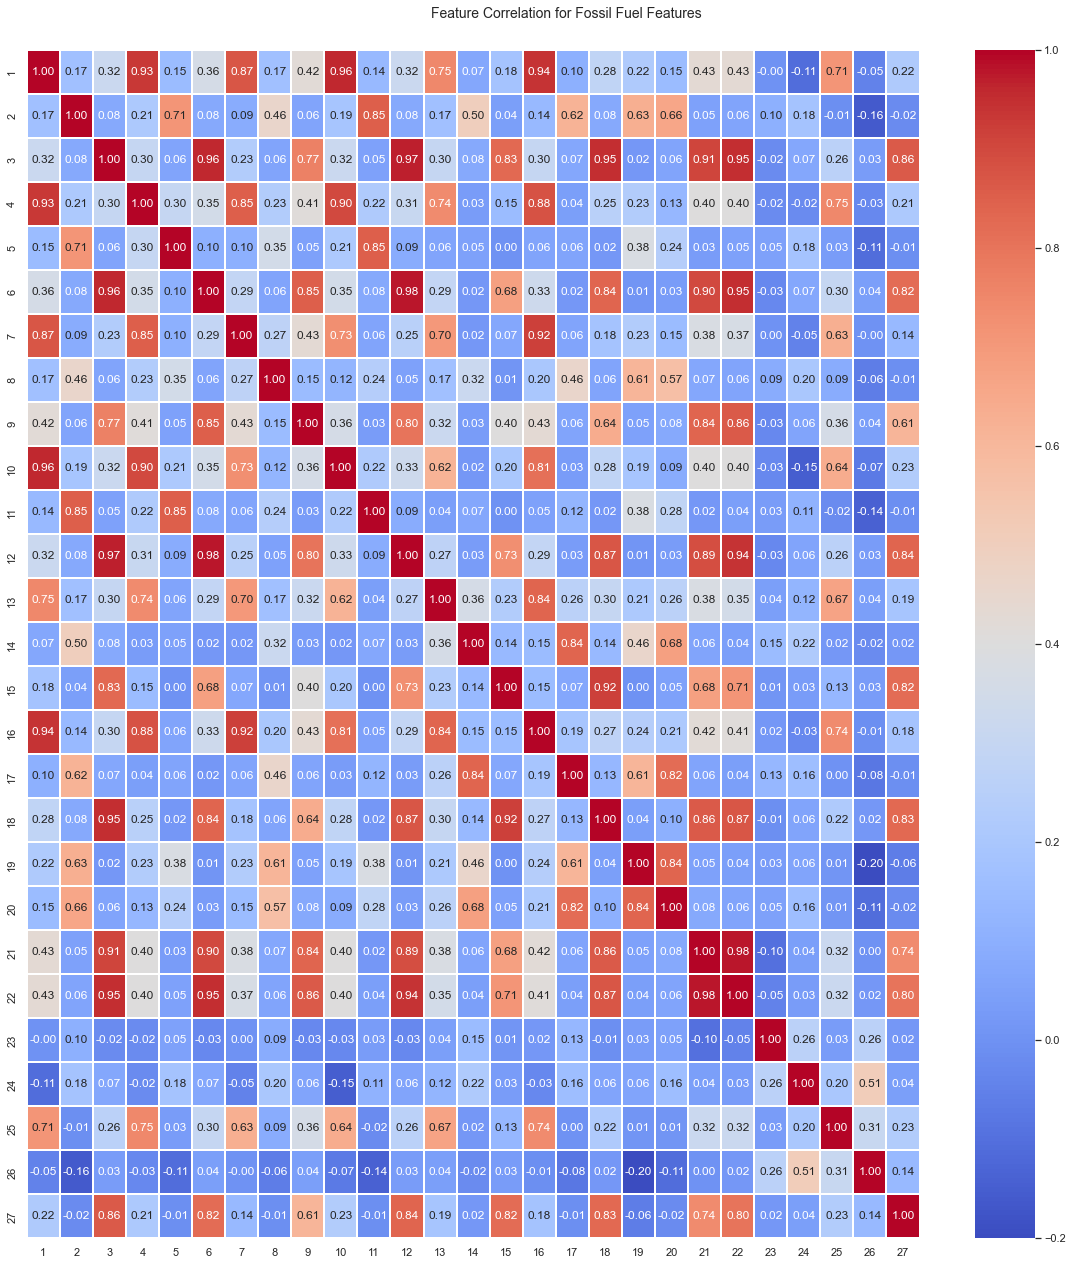

In [49]:
#correlation matrix
#plot correlation heatmap for numeric features
corrmat = fff_num_col.corr()
f, ax = plt.subplots(figsize = (20, 20))
hm = sns.heatmap(round(corrmat,2),annot=True, cmap="coolwarm",fmt='.2f',
                 linewidths=.05,
                 xticklabels=fff_fn_df.index, yticklabels = fff_fn_df.index)
f.subplots_adjust(top=0.95)
t= f.suptitle('Feature Correlation for Fossil Fuel Features', fontsize=14)
plt.show()

In [34]:
# find the high correlation features

threshold = 0.9

# Find the features with correlations above the threshold
high_correlation_features = set()

for feature in corrmat.columns:
    correlated_features = corrmat.index[corrmat[feature].abs() > threshold].tolist()
    correlated_features.remove(feature)
    high_correlation_features.update(correlated_features)

high_correlation_features = list(high_correlation_features)

print("Features with correlations above threshold ", threshold, ':')
print(high_correlation_features)


Features with correlations above threshold  0.9 :
['Fossil Free Funds: Oil / gas industry, asset', 'Fossil Free Funds: Fossil fuel holdings, count', 'Fossil Free Funds: Fossil-fired utilities, asset', 'Fossil Free Funds: Total financed emissions scope 1 + 2 + 3 (tCO2e)', 'Fossil Free Funds: Macroclimate 30 coal-fired utilities, asset', 'Fossil Free Funds: Oil / gas industry, count', 'Fossil Free Funds: Carbon Underground 200, count', 'Fossil Free Funds: Total financed emissions scope 1 + 2 (tCO2e)', 'Fossil Free Funds: Coal industry, count', 'Fossil Free Funds: Fossil-fired utilities, count', 'Fossil Free Funds: Fossil fuel holdings, asset', 'Fossil Free Funds: Carbon Underground 200, asset']


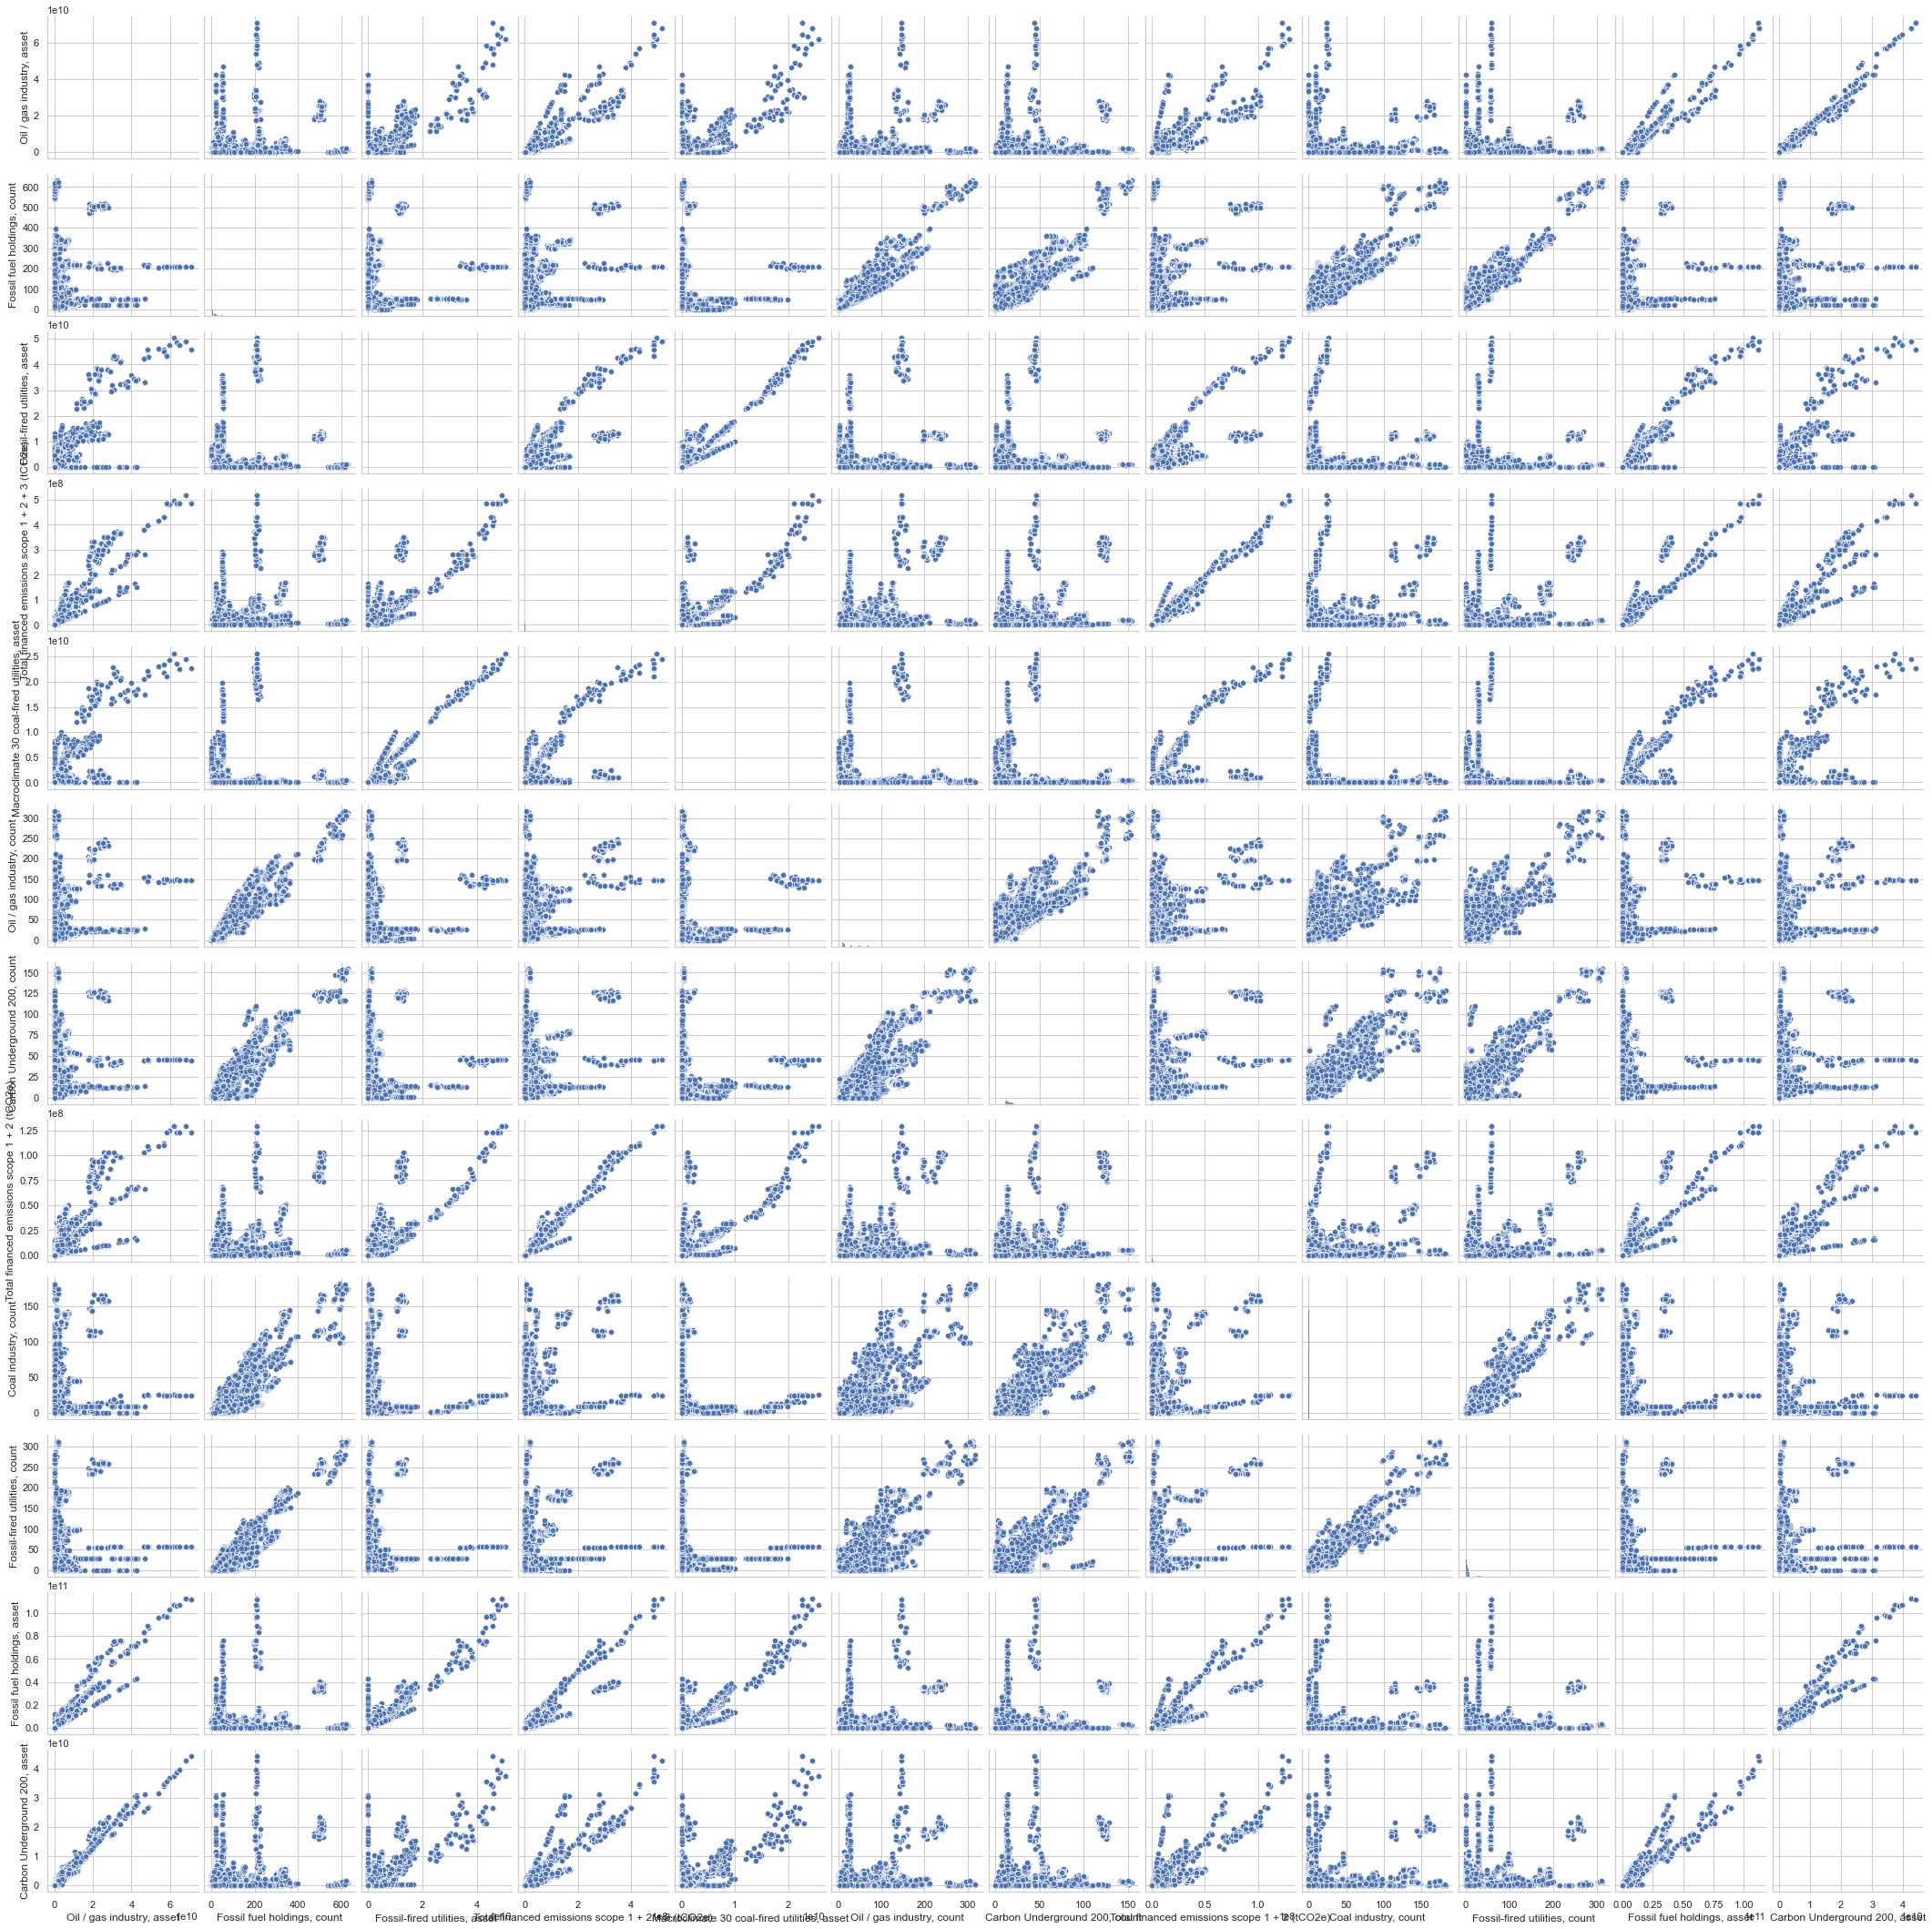

In [35]:
# only plot the high correlation features in the pairplot

fff_hcf = fff_num_col[high_correlation_features]
fff_hcf.columns = fff_hcf.columns.str.replace('Fossil Free Funds: ', '')
sns.pairplot(fff_hcf)
plt.show()

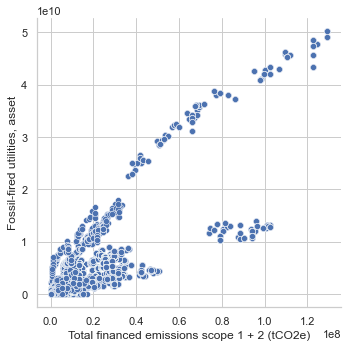

In [50]:
# visualize some of the notable correlations

sns.relplot(x = 'Total financed emissions scope 1 + 2 (tCO2e)', 
              y = 'Fossil-fired utilities, asset',
              data = fff_hcf, 
              kind = 'scatter')
plt.show()

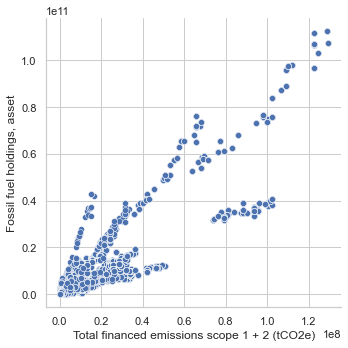

In [51]:
sns.relplot(x = 'Total financed emissions scope 1 + 2 (tCO2e)', 
              y = 'Fossil fuel holdings, asset',
              data = fff_hcf, 
              kind = 'scatter')
plt.show()

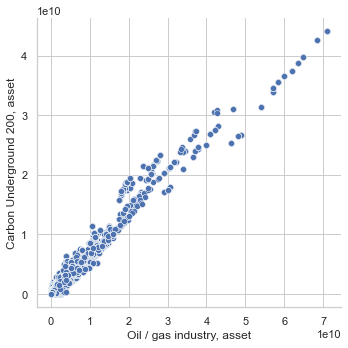

In [52]:
sns.relplot(x = 'Oil / gas industry, asset', 
              y = 'Carbon Underground 200, asset',
              data = fff_hcf, 
              kind = 'scatter')
plt.show()

[Back to the Table of Contents](#0)

<a id="6"></a> 
## Summary

In this session, we found that the mean time series of the one year returns for all the share classes have a clear pattern that the returns increased until March, 2021, then decreased until September, 2022, and since then it started to go upwards again. Comparing the mean time series of one, three, and five year returns, we can see that only the one year return has this pattern, while the other two variables are relatively flat during this period.

In the data with both the target variables and feature variables, there are six categories of ESG features. We are most interested in the category that involves the fossil fuel related variables. Using the fossil fuel grade variable, we can see from the mean time series plot for each grade that before the tipping point of March, 2021, the clean funds (the ones with better grades such as A) performs better than the fossil funds (the ones with worse grads such as F). However, when the mean values went down after that point, the fossil funds performed better than the clean funds. From the time series plot for the counts of share classes under each grade, we can see that since January 2021, the number of share classes of the most fossil rich funds (grade F) increased, while the ones of the clean funds generally decreased. It also shows a pattern shift from the period before this time point, though not as evident as the trend of the one year returns.

We also looked at the relationship between the fossil fuel related features. There are several feature pairs that have high correlation between each other. The reason could be some of them are redundant as they are largely explained by other variables or by definition is similar to another variable. We will come back to this point during the next steps of the pre-processing and modeling.

[Back to the Table of Contents](#0)